# Assignment 02
> Merritt Waldron 

> PHY 242 

> 1/31/16 

> github url

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

## Question 1

In [1]:
def linearFit(t, m, b): 
    return m*t + b

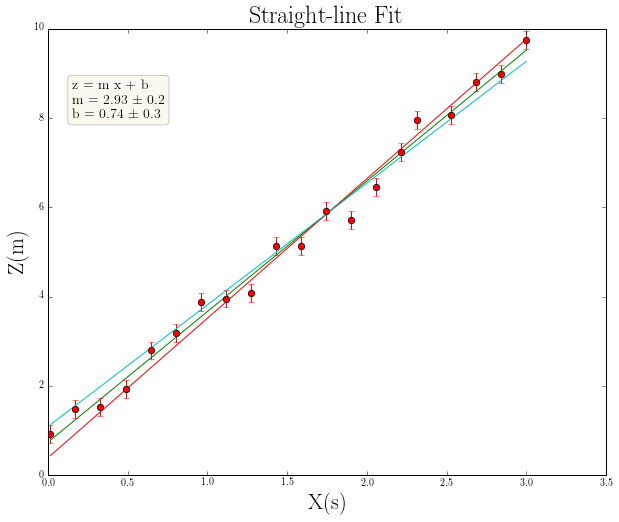

In [9]:
data = np.genfromtxt('002Data.txt', skiprows=1)

x = data[ : ,0]
z = data[ : ,1]
fitParams, fitCovariances = curve_fit(linearFit, x, z)
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])

plt.plot(x,z, 'o')
plt.plot(x, linearFit(x, fitParams[0], fitParams[1]),\
         x, linearFit(x, fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1]),\
         x, linearFit(x, fitParams[0] - 3*sigma[0], fitParams[1] + 3*sigma[1])\
        )
plt.errorbar(x, z, fmt = 'ro', yerr = 0.2)
plt.title('Straight-line Fit', fontsize=24)
plt.ylabel(r'Z(m)', fontsize=22)
plt.xlabel(r'X(s)', fontsize=22)
plt.xlim(0,3.5)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(0.15, 8.0, 
    ("z = m x + b\n m = %.2f\t $\pm$ %.1f\n b = %.2f\t $\pm$ %.1f" 
    % (fitParams[0], 3*sigma[0], fitParams[1], 3*sigma[1])), fontsize=14,bbox=props )

plt.show()

# Question 2



Plot x vs u

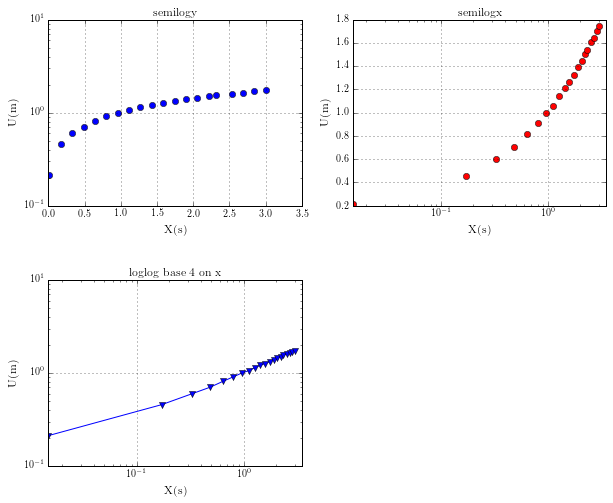

In [18]:
data = np.genfromtxt('002Data.txt', skiprows=1)

x = data[ : ,0]
u = data[ : ,2]

plt.subplots_adjust(hspace=0.4)

#log y
plt.subplot(221)
plt.semilogy(x,u, 'o')
plt.xlim(0, 3.5)
plt.title('semilogy')
plt.ylabel(r'U(m)', fontsize=12)
plt.xlabel(r'X(s)', fontsize=12)
plt.grid(True)

#log x
plt.subplot(222)
plt.semilogx(x,u, 'ro')
plt.xlim(0, 3.5)
plt.title('semilogx')
plt.ylabel(r'U(m)', fontsize=12)
plt.xlabel(r'X(s)', fontsize=12)
plt.grid(True)

# log x & y 
plt.subplot(223)
plt.loglog(x,u, '-v')
plt.xlim(0, 3.5)
plt.title('loglog base 4 on x')
plt.ylabel(r'U(m)', fontsize=12)
plt.xlabel(r'X(s)', fontsize=12)
plt.grid(True)


Now plot x vs v

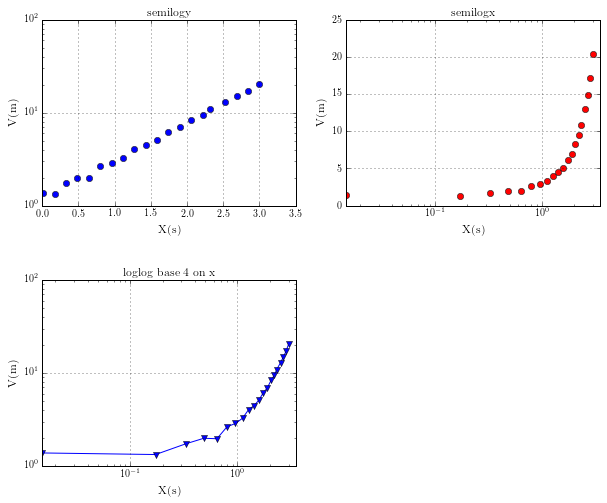

In [19]:
data = np.genfromtxt('002Data.txt', skiprows=1)

x = data[ : ,0]
v = data[ : ,3]

plt.subplots_adjust(hspace=0.4)

#log y
plt.subplot(221)
plt.semilogy(x,v, 'o')
plt.xlim(0, 3.5)
plt.title('semilogy')
plt.ylabel(r'V(m)', fontsize=12)
plt.xlabel(r'X(s)', fontsize=12)
plt.grid(True)

#log x
plt.subplot(222)
plt.semilogx(x,v, 'ro')
plt.xlim(0, 3.5)
plt.title('semilogx')
plt.ylabel(r'V(m)', fontsize=12)
plt.xlabel(r'X(s)', fontsize=12)
plt.grid(True)

# log x & y 
plt.subplot(223)
plt.loglog(x,v, '-v')
plt.xlim(0, 3.5)
plt.title('loglog base 4 on x')
plt.ylabel(r'V(m)', fontsize=12)
plt.xlabel(r'X(s)', fontsize=12)
plt.grid(True)

# Question 3 

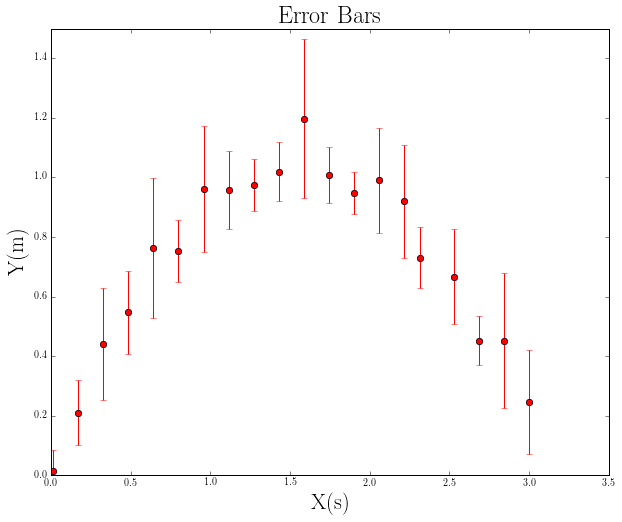

In [23]:
data = np.genfromtxt('002Data.txt', skiprows=1)

x = data[ : ,0]
y = data[ : ,4]
e = data[ : ,5]

plt.plot(x,y, 'o')
plt.errorbar(x,y, fmt= 'ro', yerr = e)
plt.xlim(0,3.5)
plt.ylim(0,1.5)
plt.title('Error Bars', fontsize=24)
plt.ylabel(r'Y(m)', fontsize=22)
plt.xlabel(r'X(s)', fontsize=22)
plt.show()

# Question 4

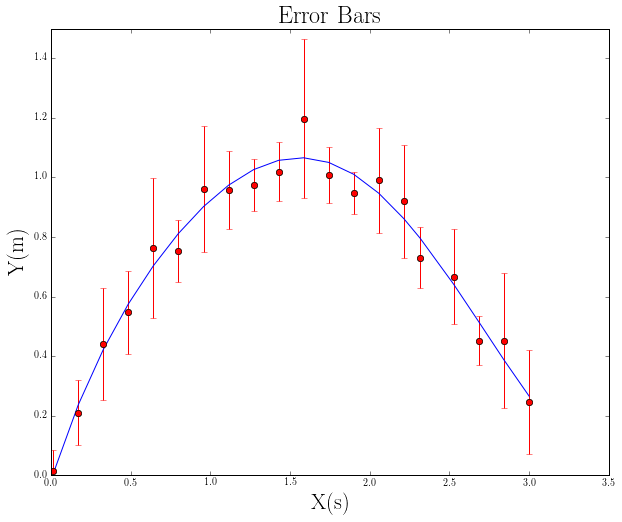

In [33]:
data = np.genfromtxt('002Data.txt', skiprows=1)

x = data[ : ,0]
y = data[ : ,4]
e = data[ : ,5]

coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)
ySqFit = polynomial(x)

plt.plot(x, ySqFit)
plt.plot(x,y, 'o')
plt.errorbar(x,y, fmt= 'ro', yerr = e)
plt.xlim(0,3.5)
plt.ylim(0,1.5)
plt.title('Error Bars', fontsize=24)
plt.ylabel(r'Y(m)', fontsize=22)
plt.xlabel(r'X(s)', fontsize=22)
plt.show()

# Question 5

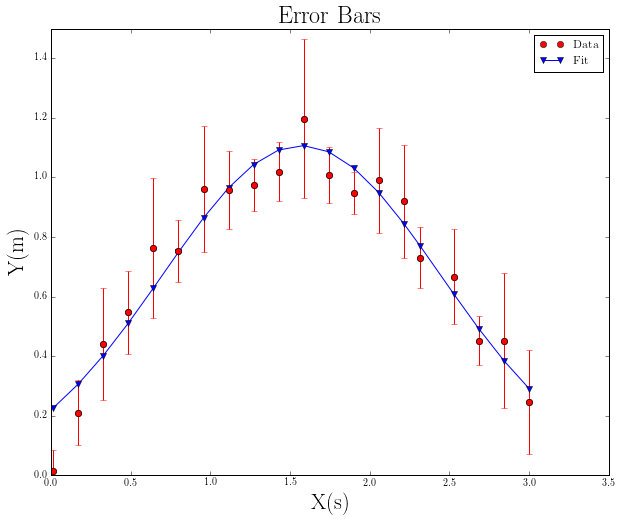

In [40]:
def gaussianWithOffset(t, a, c, s):
    return a*np.exp(-((t-c)**2)/(2*s**2))

data = np.genfromtxt('002Data.txt', skiprows=1)

x = data[ : ,0]
y = data[ : ,4]
e = data[ : ,5]

n = len(x)
mean = sum(x*y)/n
s = sum(y*(x-mean)**2)/n

popt,pcov = curve_fit(gaussianWithOffset,x,y,p0=[1,mean,s])

plt.plot(x,y, 'ro', label = 'Data')
plt.plot(x,gaussianWithOffset(x,*popt), '-v',label = 'Fit')
plt.errorbar(x,y, fmt= 'ro', yerr = e)
plt.xlim(0,3.5)
plt.ylim(0,1.5)
plt.legend()
plt.title('Error Bars', fontsize=24)
plt.ylabel(r'Y(m)', fontsize=22)
plt.xlabel(r'X(s)', fontsize=22)
plt.show()